# Assignment 1: Applied Stochastic Processes 30515

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 

### 1.  Expectation and variance of the three random variables.

In [37]:
alpha = 10
beta = 1
tau1 = 10
tau2 = 20
tau3 = 30
expectation_x = alpha/beta
variance_x = alpha/(beta)**2 + alpha/beta
expectation_T = 0.3*tau1 + 0.5*tau2 + 0.2*tau3
variance_T = 2*(0.3*(tau1)**2 + 0.5*(tau2)**2 + 0.2*(tau3)**2) - (0.3*tau1 + 0.5*tau2 + 0.2*tau3)**2
expectation_xT = (0.3*tau1 + 0.5*tau2 + 0.2*tau3)*alpha/beta
variance_xT = ((alpha/beta)**2)*(2*(0.3*(tau1)**2 + 0.5*(tau2)**2 + 0.2*(tau3)**2)-(0.3*tau1 + 0.5*tau2 + 0.2*tau3)**2)+(alpha/(beta)**2 + alpha/beta)*(2*(0.3*(tau1)**2 + 0.5*(tau2)**2 + 0.2*(tau3)**2))



In [38]:
expectation_x, variance_x, expectation_T, variance_T, expectation_xT, variance_xT

(10.0, 20.0, 19.0, 459.0, 190.0, 62300.0)

### 2. Distributions of the three random variables

#### 2.1. Distribution of X

Text(0.5, 1.0, 'Distribution of X')

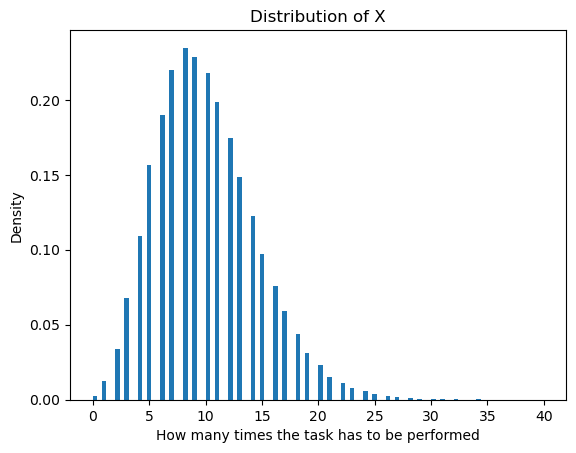

In [39]:
mu = np.random.gamma(alpha,beta,100000)
x = np.random.poisson(mu)
plt.hist(x,100,density= True)
plt.xlabel('How many times the task has to be performed')
plt.ylabel('Density')
plt.title('Distribution of X')

#### 2.2. Distribution of T

In [40]:
i = 0
tau = [tau1,tau2,tau3]
probabilities = [0.3,0.5,0.2]
distr_T = []
while i < 100000:
    tau_random = random.choices(tau,weights = probabilities,k=1)
    T = np.random.exponential(tau_random[0])
    distr_T.append(T)
    i = i+1

Text(0.5, 1.0, 'Distribution of T')

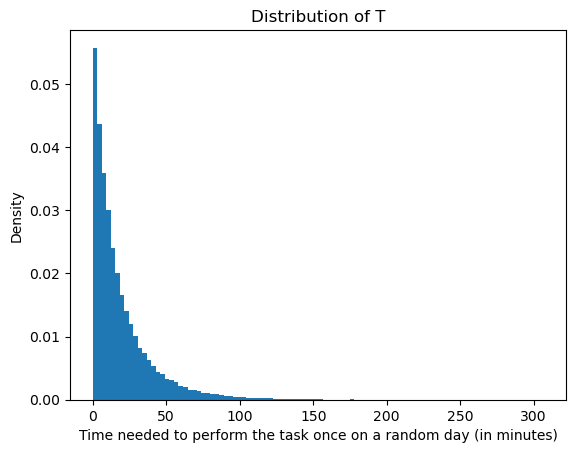

In [41]:
plt.hist(distr_T,100,density = True)
plt.xlabel('Time needed to perform the task once on a random day (in minutes)')
plt.ylabel('Density')
plt.title('Distribution of T')

#### 2.3. Distribution of TX

In [42]:
t = 0
distr_TX = []
while t < 100000:
    tau_random2 = random.choices(tau,weights = probabilities,k=1)
    T2 = np.random.exponential(tau_random2[0])
    mu = np.random.gamma(alpha,beta,1)
    x2= np.random.poisson(mu)
    TX = T2*x2[0]
    distr_TX.append(TX)
    t = t+1

Text(0.5, 1.0, 'Distribution of TX')

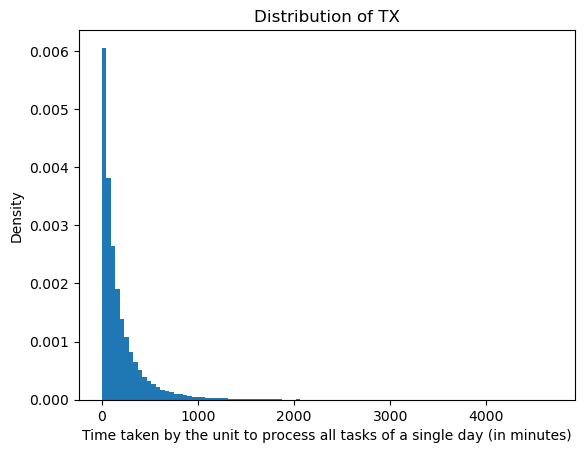

In [43]:
plt.hist(distr_TX,100,density = True)
plt.xlabel('Time taken by the unit to process all tasks of a single day (in minutes)')
plt.ylabel('Density')
plt.title('Distribution of TX')

### 3. Probability that the time taken by the unit to process all tasks of a single day is above 5 hours

In [44]:
count = 0
for s in distr_TX:
    if s > 300:
        count = count + 1
    else:
        count = count
prob = count/len(distr_TX)
prob

0.19123

### 4. Confidence intervals

In [45]:
distr_TX.sort(reverse = False)
i = round(len(distr_TX)*0.05)
j = round(len(distr_TX)*0.95)
est1 = distr_TX[i]
est2 = distr_TX[j]
conf_int90=[est1,est2]
conf_int90

[6.535866375395123, 656.1927056356312]

In [46]:
i = round(len(distr_TX)*0.025)
j = round(len(distr_TX)*0.975)
est1 = distr_TX[i]
est2 = distr_TX[j]
conf_int95=[est1,est2]
conf_int95

[3.1646275994343154, 872.4516911344606]

In [47]:
i = round(len(distr_TX)*0.005)
j = round(len(distr_TX)*0.995)
est1 = distr_TX[i]
est2 = distr_TX[j]
conf_int99=[est1,est2]
conf_int99

[0.5144806599624274, 1449.7520334319656]

### 5. Expectation and variance of the costs

In [48]:
cost = []
for w in distr_TX:
    if w <= 60:
        cost.append(100)
    else:
        x = np.ceil((w)/60)
        costo =0
        i = 0
        while i < x:
            costo = costo + 100 + 30*i
            i = i+1
        cost.append(costo)

In [49]:
expectation_cost = sum(cost)/len(cost)
expectation_cost

773.1877

In [50]:
cost_variance_list = []
cost_variance = np.var(cost,ddof = 1)
cost_variance

3661693.8325070348

### 6. Distribution of the costs

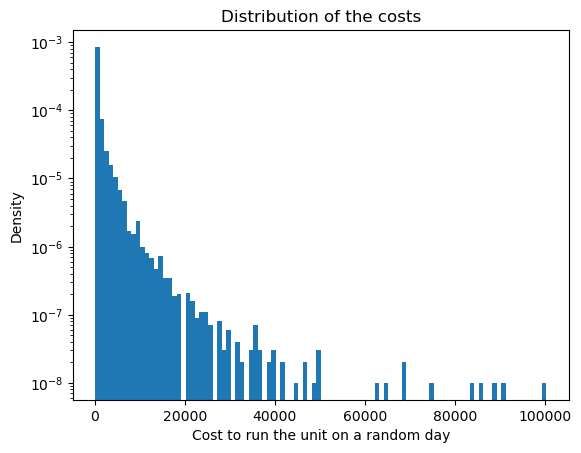

In [51]:
plt.hist(cost,100,density = True)
plt.xlabel('Cost to run the unit on a random day')
plt.ylabel('Density')
plt.title('Distribution of the costs')
plt.yscale('log')